In [143]:
import pandas as pd
pd.set_option("display.max_rows", 150)
pd.set_option('display.max_colwidth', -1)
import numpy as np
import glob

import gpxpy
import gpxpy.gpx

import re

from IPython.display import display, HTML

import requests

In [ ]:
focus_loc_ids = ["WR0186","WR0115"]

In [144]:
# functions for judging a description
not_flowing_keywords = ["dry", "no water", "no flow", "not "]
def isNotFlowing(descriptions):
    return [any([kw in description for kw in not_flowing_keywords]) for description in descriptions.astype(str)]

flowing_keywords = ["good", "flowing", "flow", "lots", "working"]
def isFlowing(descriptions):
    return [any([kw in description for kw in flowing_keywords]) for description in descriptions.astype(str)]

In [145]:
# a function that tries to fix a location id, leaves non-waypoint labels alone
# fixes the leading zeros problem
def clean_loc_id(id):
    try:
        waypoint_search = re.search('((?:WR|WA)(?:CS|))([0-9]+)', id, re.IGNORECASE)

        if waypoint_search:        
            waypoint_type = waypoint_search.group(1)
            waypoint_num = waypoint_search.group(2)

            return f"{waypoint_type}{int(waypoint_num):04}"
    except:
        return id
    return id
clean_loc_id("WR004")

'WR0004'

In [183]:
# a generator for sequentially reading in the data
def data_generator():
    for f in glob.glob("pct_data/*.xlsx"):
        data = pd.read_excel(f,usecols=[1,2,3,4,5]).dropna()
        data.columns = ["mile","loc_id","loc", "description", "date"]
        yield (data)

In [184]:
# a generator for sequentially reading in the data
def data_generator():
    for f in glob.glob("pct_data/*.xlsx"):
        data = pd.read_excel(f).dropna()
        _,cols = data.shape
        if cols == 7:
            data.columns = ["map","mile","loc_id","loc", "description", "date", "user"]
        if cols == 8:
            data.columns = ["map","mile_2","mile","loc_id","loc", "description", "date", "user"]
        yield data

In [185]:
data = pd.concat(data_generator())

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [186]:
data.sample(100)

,date,description,loc,loc_id,map,mile,mile_2,user
26,2018-06-03 00:00:00,Many liters/second of clear water.,Seasonal W Branch Nelson Creek,WBranch Nelson Creek,M4,1224.0,1221.5,Cloud Rider
18,2018-05-08 00:00:00,3:18PM : I crossed dry on a log 100 ft downstream from PCT because half of the step stones at PCT were under water.,Crabtree Meadow / Whitney Creek,10371,H1,766.3,NaN,Super Vegan
23,2018-06-02 00:00:00,Pond is full of water but does not look as good as the creek.,Small pond,WACS1216,M3,1216.1,1213.6,Cloud Rider
71,2019-04-19 00:00:00,"4/4/19 (Semper Gumby) : Location currently NO GOOD for water resupply. Also, should it be fixed in the future, the gully is NOT the best way to access - a mile or so shorted does not = easier. Using Dove Spring Canyon Rd and then SC111 (which is very much like beach sand mostly) is the better way to do it. SC111 seems quite rarely used but the sand gives it a self-maintenance quality - not rough and rutted.\n4/2/19 (Devilfish) : So as it turns out there is water at willow spring, WR620: the trough is broken, but inside the fenced enclosure up the hill from the trough around the mostly dry pond basin a white pvc pipe is putting out water at about 25s/liter. It is low to the ground, so a scoop is needed to draw water from it.\n3/24/19 : Dry, no water.",*Willow Spring\n[1.4 mi N of PCT down gulley] \n-\nWe are especially interested in water reports about this location. Please send info.,WR620,F8,620,NaN,Semper Gumby
114,2018-06-22 00:00:00,Plenty of water.,"Lava Camp Lake, campground, outhouse, 1/2 mile northeast of PCT mile 1988.3.",LavaCampLake,E12,1982.6,1980.1,Prince
22,2018-06-02 00:00:00,Many liters/second of clear water.,"Trail junction to Little Jamison Creek, 200 feet off-trail.",LittleJamison Creek,M3,1216.0,NaN,Cloud Rider
138,2017-05-13 00:00:00,"5/13/17 (Michael): Water at approximately 1 mile up from Humber Park and 1.5 miles up. 1.5 mile steam was the best, with a pool above the trail. 2/5 on reliability/flow\n4/17/17 (Pika & Paw Patrol): Devil's Slide Trail water: 1.57, 1.28, 1.14, .82 (This the mile is in order starting from Humber Park leaving Idyllwild)",Idyllwild 4.5 mi W of Saddle Junction,SaddleJct,B9,179.4,NaN,Michael
38,2018-06-24 00:00:00,Easy to cross.\n-----\nPlease be very careful while attempting this crossing. A PCT hiker in 2017 passed away close to this crossing. Her body was found downstream from the PCT crossing.,S Fork Kings River Ford\n[sometimes difficult],10040,H8,811.4,NaN,Flying Turtle
106,2018-05-05 00:00:00,"5/5/18 (Cloud Rider) : Dry.\n4/23/18 (Silver) : Dry.\n4/15/18 : Stangant water, don't rely on it.","Bike Spring [block trough just below trail, usually dry]",WR348,D1,347.7,NaN,Cloud Rider
100,2017-07-04 00:00:00,Dry,Agua Caliente Creek\n[near picnic tables],WR113,B1,112.6,NaN,Hypsy-Gypsy


In [187]:
# clean up the descriptions
data.description = data.description.str.split("\n").str[0].str.lower()

In [188]:
data["unixtime"] = (pd.to_datetime(data["date"], errors='coerce').astype(np.int64)//1000000000)

In [189]:
data.sample(10)

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime
38,2018-08-07 00:00:00,"good flow, clear water",Tributary of White Salmon River,WhiteSalmonTrib,H11,2228.9,NaN,Halfmile,1533600000
140,2018-07-09 00:00:00,7/9/18 (phoenix) : difficult to estimate the flow as it's almost flat and slow moving. water is clear.,"Lemiti Creek, established campsite nearby.",LemitiCreek,F11,2054.6,2052.1,Phoenix,1531094400
173,2019-07-01 00:00:00,7/1/19 (simon) : rapid flow.,Red Rock Spring,RedRock Spring,P5,1535.1,NaN,Simon,1561939200
71,2018-11-10 00:00:00,"8"" flow",**Holcomb Crossing [Trail Camp],BenchCamp,C10,294.6,NaN,Larry,1541808000
56,2018-06-28 00:00:00,clear of snow,Island Pass,10227,H25,924.6,NaN,Lickity Split,1530144000
45,2018-01-02 00:00:00,spigot at mount laguna visitor center was on.,"**Mount Laguna town, lodge, store\n[4/10 mi SW of WR043]",PO043,A6,41.4,NaN,John,1514851200
95,2018-08-03 00:00:00,plenty of water,Island Lake,IslandLake,E6,1946.5,1944,Shepherd,1533254400
28,2019-07-13 00:00:00,7/13/19 (dalem) : multiple liters per minute.,"Honeymoon Creek, often muddy, water is often better at mile 1798.2",Honeymoon Creek,C5,1802.1,NaN,"Dalem, Intrepid",1562976000
50,2018-10-13 00:00:00,abundant clear water,**Mission Spring Trail Camp,WR0240,C4,239.9,NaN,Gary,1539388800
94,2018-08-03 00:00:00,plenty of water,Island Lake,IslandLake,E6,1946.5,1944,Shepherd,1533254400


In [190]:
waypoints = {}
for path in glob.glob("gps/*.gpx"):
    gpx_file = open(path, 'r')
    gpx = gpxpy.parse(gpx_file)
    waypoints.update({wp.name:wp for wp in gpx.waypoints})
    
lat = {clean_loc_id(wp.name):wp.latitude for wp in waypoints.values()}
lon = {clean_loc_id(wp.name):wp.longitude for wp in waypoints.values()}

In [191]:
data.loc_id = data.loc_id.apply(clean_loc_id)

In [192]:
data["lat"] = data["loc_id"].map(lat)
data["lon"] = data["loc_id"].map(lon)

In [193]:
# lists the waypoint labels that are being thrown away
# there shouldn't be many in here that look valid
data[data.lat.isnull()].sample(100)

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime,lat,lon
49,2018-06-28 00:00:00,crossed dry in the morning.,N Fork Mono Creek Ford,7972,H18,879.4,NaN,Flying Turtle,1530144000,NaN,NaN
75,2018-06-03 00:00:00,6/3/18 (dalem) : good flow.,Andesite Spring,Andesite Spring,N2,1299.6,1297.1,Dalem,1527984000,NaN,NaN
154,2018-07-11 00:00:00,many liters/minute of clear water.,"Winton Canyon Creek, wooden bridge.",WintonCanyon Creek,P1,1504.7,1502.2,Slow Go,1531267200,NaN,NaN
57,2019-06-14 00:00:00,6/14/19 (no worries) : 10 gallons.,Highway 58,HWY58,E13,566.5,NaN,No Worries,1560470400,NaN,NaN
33,2018-06-24 00:00:00,easy to cross in the morning.,Baxter Creek,9524,H6,797.1,NaN,Flying Turtle,1529798400,NaN,NaN
211,2019-07-04 00:00:00,7/4/19 (intrepid) : steady slow flow from pipe.,"Buckhorn Spring, small signed spring 150 feet W of the PCT in a meadow NW of the large three-forked tree",Buckhorn Spring,Q6,1634.5,NaN,Intrepid,1562198400,NaN,NaN
47,2018-06-11 00:00:00,flowing adequately.,**Mission Creek Crossing,WR0233,C3,232.9,NaN,Ahjah,1528675200,NaN,NaN
56,2018-02-17 00:00:00,"no flow from pipe and the trough was dry, but water flowing alongside it on the ground. i didn't fill up here, but it looked to be decent flow, perhaps ~0.5l/min",**Robin Bird Spring [0.1 mi W]\n-\nWe are especially interested in water reports about this location. Please send info.,WR0602,F5,602.1,NaN,Betsy,1518825600,NaN,NaN
12,Ken,NaN,"dry as a bone, no pools any of anywhere",Hauser Creek [early spring only],A2,WRCS016,15.4,2013-04-12 00:00:00,-9223372037,NaN,NaN
30,2018-06-24 00:00:00,easy to cross in the morning.,Upper Rae Lakes outlet,10548,H5,793,NaN,Flying Turtle,1529798400,NaN,NaN


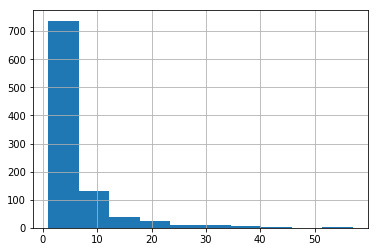

In [194]:
data.groupby("loc_id").nunique().date.hist()

In [195]:
data = data.drop_duplicates(subset=["date","loc_id"])

In [196]:
display(data.groupby("loc_id").nunique().sort_values(by="date")[-80:])

,date,description,loc,loc_id,map,mile,mile_2,user,unixtime,lat,lon
loc_id,,,,,,,,,,,
Road22,15,15,3,1,1,1,1,14,15,1,1
WR0699,15,15,1,1,1,1,0,15,15,1,1
WR0240,15,14,1,1,1,1,0,15,15,1,1
WR0037,16,16,1,1,1,1,0,15,16,1,1
CibbetsCG,16,13,1,1,1,1,0,16,16,1,1
WR0419,16,15,3,1,1,1,0,16,16,1,1
WR0286,16,15,1,1,1,2,0,15,16,1,1
BurntRanchCG,16,15,1,1,1,1,0,16,16,1,1
WR0068,16,16,2,1,1,1,0,14,16,1,1


In [236]:
display(data[data.loc_id == "WR0004"].sort_values(by="date"))

,date,description,loc,loc_id,map,user,unixtime,lat,lon,not_flowing,flowing,decision,status
12,2015-04-22 00:00:00,dry,Creeklet [early spring only],WR0004,A1,Blaize,1429660800,32.608,-116.498991,True,False,True,0.0
12,2015-05-25 00:00:00,dry,Creeklet [early spring only],WR0004,A1,Tuna Helper,1432512000,32.608,-116.498991,True,False,True,0.0
12,2017-01-25 00:00:00,strong flow,Creeklet [early spring only],WR0004,A1,Tink & Screagle,1485302400,32.608,-116.498991,False,True,True,1.0
12,2017-02-20 00:00:00,medium flow,Creeklet [early spring only],WR0004,A1,Ben,1487548800,32.608,-116.498991,False,True,True,1.0
12,2017-03-16 00:00:00,great flow,Creeklet [early spring only],WR0004,A1,Cruise Control,1489622400,32.608,-116.498991,False,True,True,1.0
12,2017-03-21 00:00:00,excellent flow,Creeklet [early spring only],WR0004,A1,Slingblade,1490054400,32.608,-116.498991,False,True,True,1.0
12,2017-03-31 00:00:00,excellent flow,Creeklet [early spring only],WR0004,A1,Alex & Taylor,1490918400,32.608,-116.498991,False,True,True,1.0
12,2017-04-13 00:00:00,good flow,Creeklet [early spring only],WR0004,A1,"Ellen B, Matt",1492041600,32.608,-116.498991,False,True,True,1.0
12,2017-04-19 00:00:00,"creek running strong. beware poison oak, but good water. flowing several liters per minute.",Creeklet [early spring only],WR0004,A1,Navigator,1492560000,32.608,-116.498991,False,True,True,1.0
12,2017-04-29 00:00:00,good flow. first water from terminus.,Creeklet [early spring only],WR0004,A1,Shermin,1493424000,32.608,-116.498991,False,True,True,1.0
